In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
# import mnist dataset
from dataset.dataset import Dataset
# custom library
from utility.utility import Utility
from network.loss_functions import Loss
from network.early_stopping import EarlyStopping
from network.neural_network import NeuralNetwork
from network.activation_functions import ActivationFunctions

In [2]:
# get dataset
X_train, Y_train, X_test, Y_test = Dataset.load_mnist()
X_train, Y_train, X_val, Y_val = Dataset.train_val_split(X_train, Y_train, percentage=0.2, random_state=None)

In [3]:
# print dataset 
Utility.print_info_dataset(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)

+-----------+-----------+-----------+
| Dataset   |   X shape |   Y shape |
+===========+===========+===========+
| X_train   |       784 |     48000 |
+-----------+-----------+-----------+
| Y_train   |        10 |     48000 |
+-----------+-----------+-----------+
| X_val     |       784 |     12000 |
+-----------+-----------+-----------+
| Y_val     |        10 |     12000 |
+-----------+-----------+-----------+
| X_test    |       784 |     10000 |
+-----------+-----------+-----------+
| Y_test    |        10 |     10000 |
+-----------+-----------+-----------+ 



In [4]:
# initialize the network
nn = NeuralNetwork(input_size=X_train.shape[0],
                   output_size=Y_train.shape[0],
                   n_hidden_layers=1,
                   m_neurons_list=[68],
                   activation_list=[ActivationFunctions.sigmoid, ActivationFunctions.identity],
                   error_function=Loss.cross_entropy_softmax)

In [5]:
# print network info
nn.summary()

Network summary

 +-----------------+--------------+---------------+--------------------+-----------------+---------------+-----------------------+
|      Layer      |   Input size |   Output size |    #N. of neurons  | Weights shape   | Activation    | Error                 |
|                 |              |               |    of hidden layer |                 | functions     | functions             |
+=================+==============+===============+====================+=================+===============+=======================+
|      Input      |          784 |               |                    |                 |               |                       |
+-----------------+--------------+---------------+--------------------+-----------------+---------------+-----------------------+
| Hidden Layer #1 |              |               |                 68 | (68, 784)       | sigmoid       |                       |
+-----------------+--------------+---------------+--------------------+-

In [6]:
# copy the network to compare with an untrained one
not_trained = nn.copy_network()

In [7]:
# training
res = nn.train(x_train=X_train, 
                y_train=Y_train, 
                x_val=X_val, 
                y_val=Y_val,
                learning_rate=0.00006228,
                momentum=0.6522,
                epochs=500,
                early_stopper=EarlyStopping(),
                mode='batch',
                num_mini_batches=32)

Learning mode is batch
[==============================]

Epoch 1/500
[==============================] - 0.50s/step - loss: 124273.3769 - accuracy: 0.2049 - val_loss: 31137.4955 - val_accuracy: 0.2084 -  p: 15
Epoch 2/500
[==============================] - 0.39s/step - loss: 146418.8203 - accuracy: 0.2328 - val_loss: 36885.7161 - val_accuracy: 0.2320 -  p: 15
Epoch 3/500
[==============================] - 0.64s/step - loss: 106565.3067 - accuracy: 0.1960 - val_loss: 26816.2112 - val_accuracy: 0.1870 -  p: 14
Epoch 4/500
[==============================] - 0.75s/step - loss: 96873.7296 - accuracy: 0.3463 - val_loss: 24259.2762 - val_accuracy: 0.3473 -  p: 15
Epoch 5/500
[==============================] - 0.68s/step - loss: 88887.7434 - accuracy: 0.3084 - val_loss: 22225.8009 - val_accuracy: 0.3121 -  p: 15
Epoch 6/500
[==============================] - 0.37s/step - loss: 73898.0035 - accuracy: 0.4606 - val_loss: 18537.2052 - val_accuracy: 0.4553 -  p: 15
Epoch 7/500
[=====================

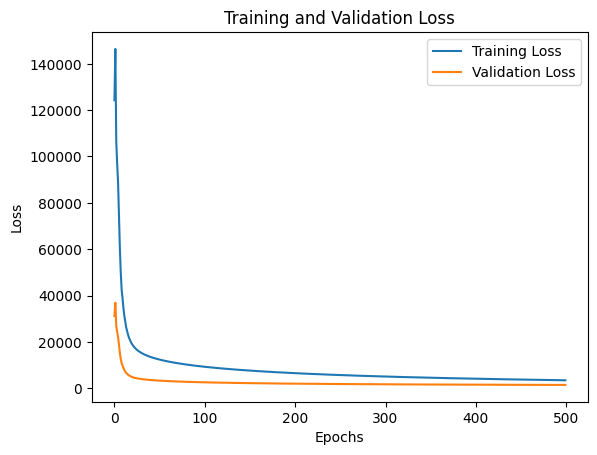

In [8]:
# plot Loss
plt.figure()
plt.plot(res['Loss_train'], label="Training Loss")
plt.plot(res['Loss_val'], label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

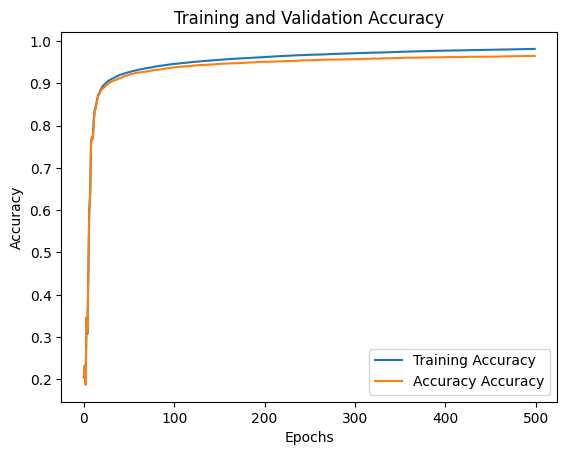

In [9]:
# plot Accuracy
plt.figure()
plt.plot(res['Accuracy_train'], label="Training Accuracy")
plt.plot(res['Accuracy_val'], label="Accuracy Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.close() 

Accuracy 0.9673

Report:
              precision    recall  f1-score   support

     Digit 0       0.97      0.98      0.98       980
     Digit 1       0.98      0.99      0.98      1135
     Digit 2       0.97      0.97      0.97      1032
     Digit 3       0.95      0.98      0.97      1010
     Digit 4       0.96      0.96      0.96       982
     Digit 5       0.97      0.95      0.96       892
     Digit 6       0.97      0.97      0.97       958
     Digit 7       0.97      0.97      0.97      1028
     Digit 8       0.97      0.96      0.96       974
     Digit 9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



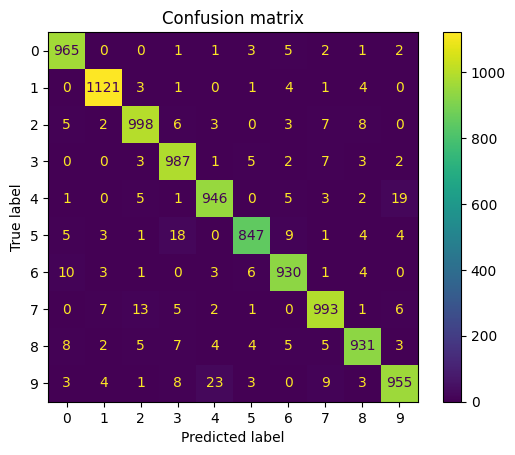

In [10]:
# evaluation of trained model
target_names = ['Digit 0', 'Digit 1', 'Digit 2', 'Digit 3', 'Digit 4', 'Digit 5', 
                'Digit 6', 'Digit 7', 'Digit 8', 'Digit 9',]
accuracy, confusion_matrix, report = nn.evaluate_model(X_test, Y_test, target_names)
# print results
print(f"Accuracy {accuracy}\n")
print(f"Report:\n{report}")
# plot confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=np.arange(10))
display.plot()
plt.title("Confusion matrix")
plt.show()

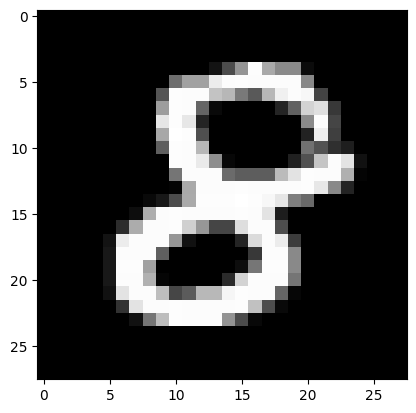


Element chosen has [[8]] and has shape (784, 1)



In [11]:
# get random element from test set
elem, label = Utility.get_random_elem(X_test, Y_test)
print(f"\nElement chosen has [{label}] and has shape {elem.shape}\n")

In [12]:
# print prediction
trained_prediction = nn.predict(elem)
not_trained_prediction = not_trained.predict(elem)
print("Prediction from trained network:\n", trained_prediction, "\nNetwork prediction: ", np.argmax(trained_prediction))
print("=" * 50)
print("Prediction from NOT trained network:\n", not_trained_prediction, "\nNetwork prediction: ", np.argmax(not_trained_prediction))
print("=" * 50, "\n")

Prediction from trained network:
 [[3.04379260e-05]
 [9.80688038e-07]
 [1.40924040e-05]
 [2.77087254e-05]
 [1.20942960e-05]
 [5.25032518e-05]
 [2.91406527e-04]
 [4.52183065e-08]
 [9.99554022e-01]
 [1.67091118e-05]] 
Network prediction:  8
Prediction from NOT trained network:
 [[0.07256024]
 [0.16748776]
 [0.13890253]
 [0.0777495 ]
 [0.10959967]
 [0.06363801]
 [0.08704186]
 [0.13597692]
 [0.08088235]
 [0.06616116]] 
Network prediction:  1

